### **Preprocessing Setup**  

Imports necessary libraries and downloads  **NLTK resources** for text preprocessing.  

In [12]:
import nltk
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to C:\Users\ANH
[nltk_data]     KHOA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ANH
[nltk_data]     KHOA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\ANH
[nltk_data]     KHOA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ANH
[nltk_data]     KHOA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Setting Up the Project Path for Imports**

In [13]:
import os
import sys
print(os.getcwd())
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../../")) 
sys.path.append(project_root)  # Ensure src/ is found

d:\HCMUT\Courses\HK242\ML\ML_capybara\src\models\BN model


### **Loading Dataset and Train the Bayesian Network**


In [14]:
from src.models.BN_model import SentimentBayesianNetwork  
from src.data.preprocess import Preprocessing  
from sklearn.model_selection import train_test_split

# Load dataset
pre_proc = Preprocessing()
file_path = 'test.csv'
df = pre_proc.read_CSV(file_path)


train_df, test_df = train_test_split(df, test_size=0.9, random_state=42, stratify=df['sentiment'])
# Train the model
model = SentimentBayesianNetwork(train_df, pre_proc)


### **Evaluating the Sentiment Bayesian Network Model**

Computes metrics: **F1-score, and a confusion matrix** to evaluate the model.



Model F1-score (Weighted): 0.3840
Model Accuracy: 0.3878

Classification Report:
               precision    recall  f1-score   support

    negative       0.31      0.52      0.39       246
     neutral       0.35      0.23      0.28       360
    positive       0.56      0.47      0.51       294

    accuracy                           0.39       900
   macro avg       0.41      0.41      0.39       900
weighted avg       0.41      0.39      0.38       900



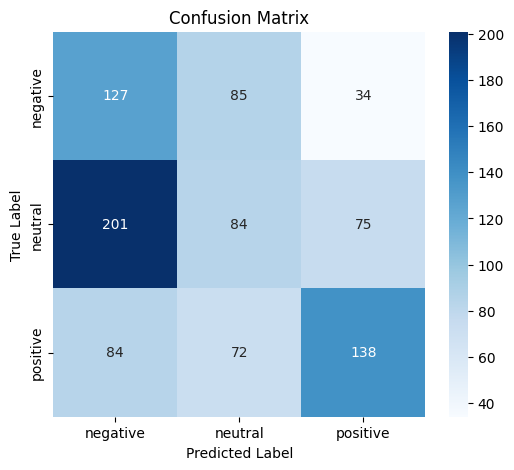

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score
true_labels = test_df['sentiment'].tolist()

predicted_labels = []
for text in test_df['text']:
    probs, labels = model.infer(text)  
    predicted_sentiment = labels[probs.argmax()]  
    predicted_labels.append(predicted_sentiment)

# Compute statistic
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
report = classification_report(true_labels, predicted_labels, target_names=labels)

print(f"\nModel F1-score (Weighted): {f1:.4f}")
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()